# Transfer learning with tensorflow fine tuning

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-02-11 15:51:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-02-11 15:51:17 (70.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, unzip_data, walk_through_dir

## tf.keras.applications

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2025-02-11 15:51:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 74.125.26.207, 108.177.11.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   121MB/s    in 1.3s    

2025-02-11 15:51:35 (121 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

## Model 0: Keras functional API

In [ ]:
# 1. Create base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. normalize if using model like ResNet50V2
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# 5. pass the inputs to base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(len(train_data_10_percent.class_names), activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)


In [ ]:
# 10. Fite the model and save its history
history_0 = model_0.fit(train_data_10_percent,
                         epochs=5,
                         steps_per_epoch=len(train_data_10_percent),
                         validation_data=test_data_10_percent,
                         validation_steps=int(0.25 * len(test_data_10_percent)),
                         callbacks=[create_tensorboard_callback(dir_name="transfer_Learning",
                                                               experiment_name="10_percent_feature_extraction")])

Saving TensorBoard log files to: transfer_Learning/10_percent_feature_extraction/20250211-155142
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.2579 - loss: 2.1538 - val_accuracy: 0.7303 - val_loss: 1.3402
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.7351 - loss: 1.2451 - val_accuracy: 0.8026 - val_loss: 0.8953
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.7963 - loss: 0.9063 - val_accuracy: 0.8224 - val_loss: 0.7148
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8509 - loss: 0.6863 - val_accuracy: 0.8438 - val_loss: 0.6251
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8520 - loss: 0.6418 - val_accuracy: 0.8388 - val_loss: 0.5769


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_layer
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, None, None, 3)  │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 32) │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 32) │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 32) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, None, None, 16) │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, None, None, 16) │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, None, None, 16) │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, None, None, 64) │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, None, None, 64) │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, None, None, 64) │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, None, None, 32) │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, None, None, 32) │            128 │ block2a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

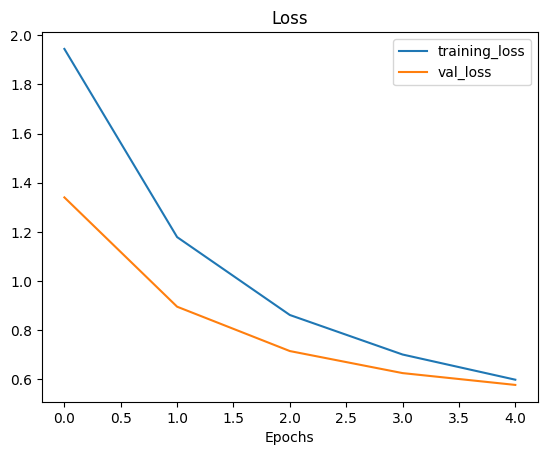

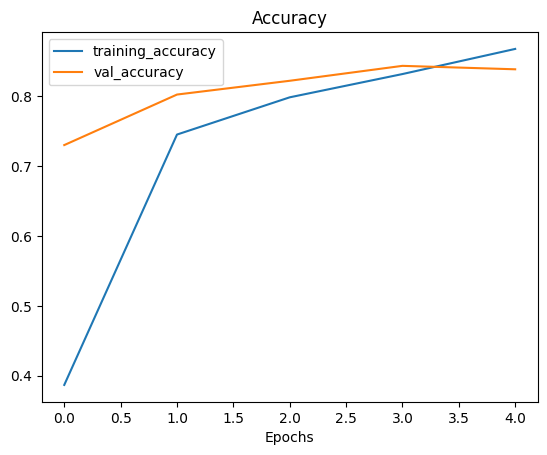

In [ ]:
plot_loss_curves(history_0)

## Getting a feature vector from a trained model

In [ ]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random Input tensor:\n {input_tensor}\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"Global Average Pooled tensor:\n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of Global Average Pooled tensor: {global_average_pooled_tensor.shape}")

Random Input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

Global Average Pooled tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]

Shape of input tensor: (1, 4, 4, 3)
Shape of Global Average Pooled tensor: (1, 3)


In [ ]:
# replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [ ]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2025-02-11 15:58:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 173.194.215.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   119MB/s    in 1.1s    

2025-02-11 15:58:32 (119 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir_1_percent = "10_food_classes_1_percent/test/"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Include data augmentation in the model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth, Resizing, Rescaling

data_augmentation = keras.Sequential(
    [
        # Rescaling(1./255),
        Resizing(224, 224),
        RandomFlip("horizontal"),
        RandomRotation(0.2),
        RandomZoom(0.2),
        RandomHeight(0.2),
        RandomWidth(0.2)

    ], name="data_augmentation")

## Visualize data augmentation layer
## augmented_img = data_augmentation(img, training=True)

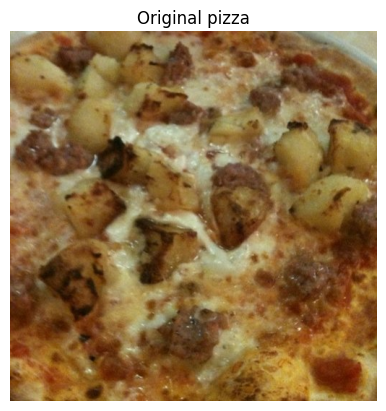

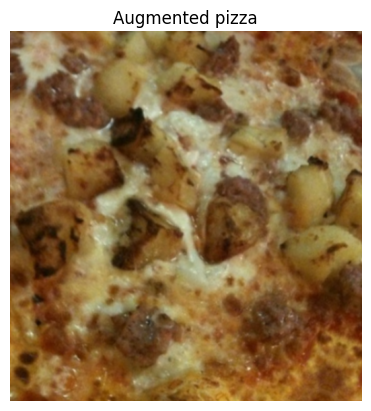

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

target_class = random.choice(train_data_1_percent.class_names)

target_dir = os.path.join(train_dir_1_percent, target_class)

random_img = random.choice(os.listdir(target_dir))

random_img_path = os.path.join(target_dir, random_img)

img = mpimg.imread(random_img_path)
plt.imshow(img)
plt.title(f"Original {target_class}")
plt.axis(False);

augmented_img = data_augmentation(tf.expand_dims(img, axis=0), training=True)
augmented_img = augmented_img[0].numpy().astype("uint8")
plt.figure()
plt.imshow(augmented_img)
plt.title(f"Augmented {target_class}")
plt.axis(False);

## Model 1: Feature extraction transfer learning on 1% of the data augmented

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add data augmentation
x = data_augmentation(inputs, training=True)

# Resizing layer to ensure the output size is (224, 224, 3)
# x = tf.keras.layers.Resizing(224, 224)(x) # Add this line

# pass the inputs to base model
x = base_model(x, training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Add output layer
outputs = layers.Dense(len(train_data_1_percent.class_names), activation="softmax", name="output_layer")(x)

# Make a model using the inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data_1_percent,
                         epochs=5,
                         steps_per_epoch=len(train_data_1_percent),
                         validation_data=test_data_1_percent,
                         validation_steps=int(0.25 * len(test_data_1_percent)),
                         callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20250211-160141
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 66s 25s/step - accuracy: 0.0858 - loss: 2.3668 - val_accuracy: 0.2007 - val_loss: 2.1684
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 24s/step - accuracy: 0.2301 - loss: 2.1224 - val_accuracy: 0.2862 - val_loss: 2.0668
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 141s 53s/step - accuracy: 0.3739 - loss: 1.9662 - val_accuracy: 0.3668 - val_loss: 1.9568
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 23s/step - accuracy: 0.4460 - loss: 1.8080 - val_accuracy: 0.4194 - val_loss: 1.8698
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 24s/step - accuracy: 0.5728 - loss: 1.6889 - val_accuracy: 0.4753 - val_loss: 1.7737


In [ ]:
# Evaluate on the full test data
results_1_percent_data_aug = model_1.evaluate(test_data_1_percent)

79/79 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.4873 - loss: 1.7760


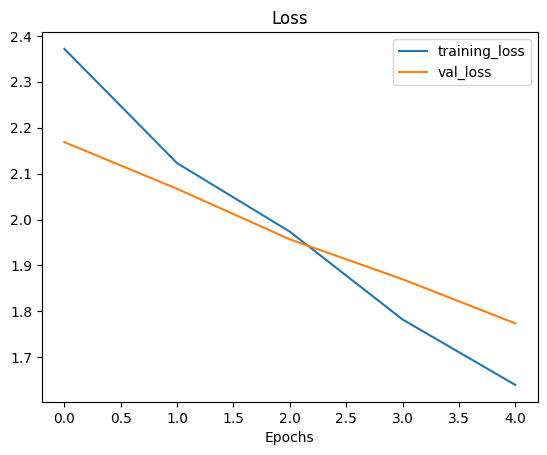

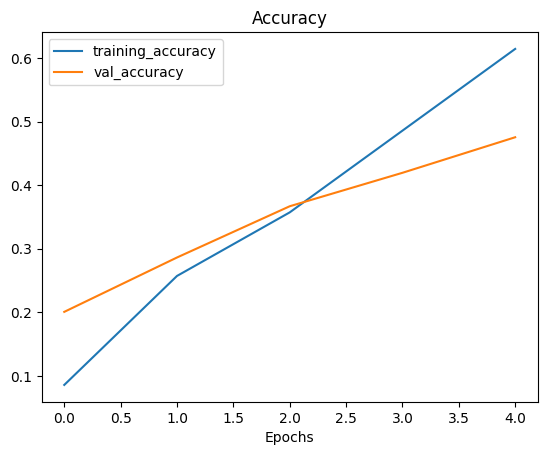

In [ ]:
# loss curve
plot_loss_curves(history_1)

## Model 2: feature extraction transfer learning with 10% data augmented

In [ ]:
# Get 10% of data
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
# Set data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
from ast import mod
# Create model 2 with data augmentation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth, Resizing, Rescaling
from tensorflow.keras import Sequential

data_augmentation =Sequential(
    [
        # Rescaling(1./255),
        Resizing(224, 224),
        RandomFlip("horizontal"),
        RandomRotation(0.2),
        RandomZoom(0.2),
        RandomHeight(0.2),
        RandomWidth(0.2)

    ], name="data_augmentation")

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add data augmentation
x = data_augmentation(inputs, training=True)
x = base_model(x, training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Add output layer
outputs = layers.Dense(len(train_data_10_percent.class_names), activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Creating a model checkpoint callback
checkpoint_path = "ten_percent_model_checkpoint_weights/checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                          save_weights_only=True,
                                                          save_best_only=False,
                                                          save_freq = "epoch",
                                                          verbose=1)


In [ ]:
# Fit the model
initial_epochs = 5
history_2 = model_2.fit(train_data_10_percent,
                         epochs=initial_epochs,
                         steps_per_epoch=len(train_data_10_percent),
                         validation_data=test_data,
                         validation_steps=int(0.25 * len(test_data)),
                         callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_data_aug"),
                                    checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20250211-161240
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2202 - loss: 2.2013
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 122s 5s/step - accuracy: 0.2237 - loss: 2.1946 - val_accuracy: 0.7072 - val_loss: 1.3922
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6535 - loss: 1.4111
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - accuracy: 0.6534 - loss: 1.4086 - val_accuracy: 0.8191 - val_loss: 0.9489
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7773 - loss: 1.0352
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.7769 - loss: 1.0351 - val_accuracy: 0.8520 - val_loss: 0.7590
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7936 

In [ ]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8552 - loss: 0.5641


[0.5689837336540222, 0.8564000129699707]

In [ ]:
results_2 = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.8625 - loss: 0.5955


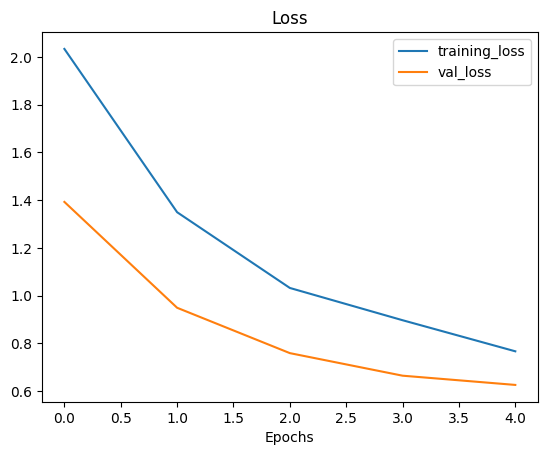

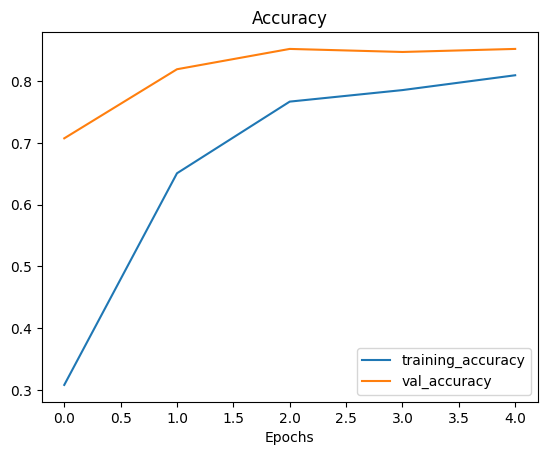

In [ ]:
plot_loss_curves(history_2)

## Loading checkpoint weights

In [ ]:
# Load in saved checkpoints
model_2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_2_results = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.8619 - loss: 0.6094


In [ ]:
import numpy as np
np.isclose(loaded_weights_model_2_results, results_2)

array([ True,  True])

## Model 3: Fine tuning with 10% of data
Fine tuning usually works better after training a feaure extraction model for a few epochs

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

When using fine tuning lower the learning rate by 10

In [ ]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_8 False
1 rescaling_9 False
2 normalization_5 False
3 rescaling_10 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squee

In [ ]:
history_3 = model_2.fit(train_data_10_percent,
                         epochs=initial_epochs + 5,
                         steps_per_epoch=len(train_data_10_percent),
                         validation_data=test_data,
                         validation_steps=int(0.25 * len(test_data)),
                         initial_epoch=history_2.epoch[-1], # start from previous last epoch
                         callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_fine_tune_last_10"),
                                    checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20250211-163222
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7840 - loss: 0.8263
Epoch 5: saving model to ten_percent_model_checkpoint_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.7842 - loss: 0.8258 - val_accuracy: 0.8586 - val_loss: 0.5398
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8276 - loss: 0.6957
Epoch 6: saving model to ten_percent_model_checkpoint_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.8279 - loss: 0.6949 - val_accuracy: 0.8635 - val_loss: 0.4942
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8487 - loss: 0.6110
Epoch 7: saving model to ten_percent_model_checkpoint_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.8487 - loss: 0.6110 - val_accuracy: 0.8618 - val_loss: 0.4789
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accu

In [ ]:
results_3 = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.8697 - loss: 0.4278


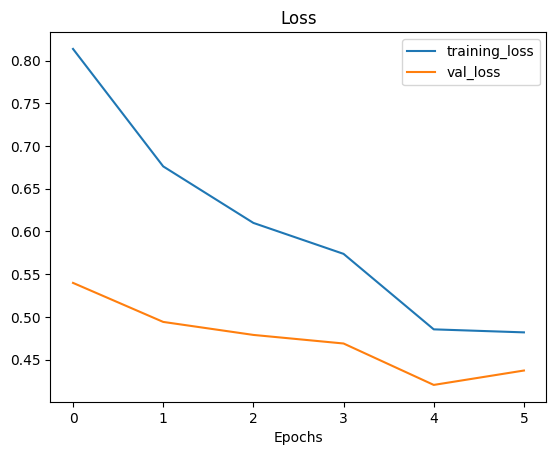

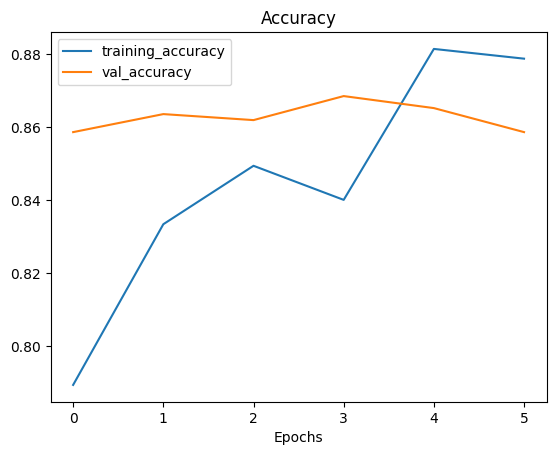

In [ ]:
plot_loss_curves(history_3)

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]
  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]
  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Validation Accuracy")
  plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Validation Loss")
  plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

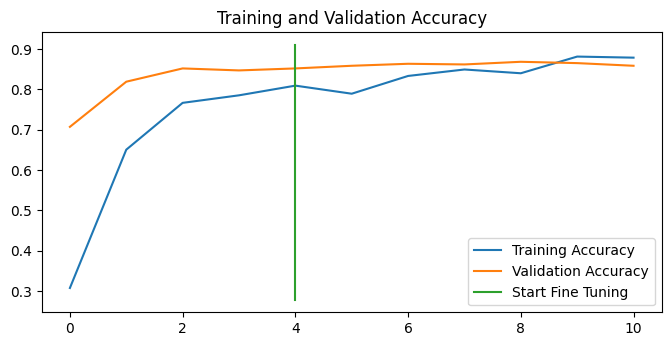

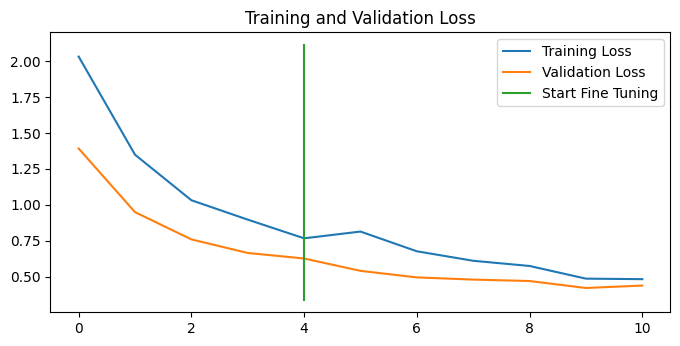

In [ ]:
compare_historys(original_history=history_2,
                 new_history=history_3,
                 initial_epochs=initial_epochs)

## Model 4: Fine tunng on all data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")

--2025-02-11 16:48:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.207, 173.194.210.207, 173.194.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  64.7MB/s    in 7.3s    

2025-02-11 16:48:49 (67.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Setup trainig and tes dir
train_dir_all_data = "10_food_classes_all_data/train/"
test_dir_all_data = "10_food_classes_all_data/test/"

In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_all_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_all_data,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE)
test_data_all_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_all_data,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs + 5
history_4 = model_2.fit(train_data_all_data,
                         epochs=fine_tune_epochs,
                        #  steps_per_epoch=len(train_data_all_data),
                         validation_data=test_data_all_data,
                         validation_steps=int(0.25 * len(test_data_all_data)),
                         initial_epoch=history_2.epoch[-1], # start from previous last epoch
                         callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_fine_tune_last_10_all_data")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10_all_data/20250211-164857
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 713s 3s/step - accuracy: 0.7909 - loss: 0.6679 - val_accuracy: 0.8964 - val_loss: 0.3341
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 742s 3s/step - accuracy: 0.8257 - loss: 0.5495 - val_accuracy: 0.8997 - val_loss: 0.3088
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 685s 3s/step - accuracy: 0.8369 - loss: 0.4926 - val_accuracy: 0.9095 - val_loss: 0.2949
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 801s 3s/step - accuracy: 0.8611 - loss: 0.4434 - val_accuracy: 0.9095 - val_loss: 0.2767
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 681s 3s/step - accuracy: 0.8628 - loss: 0.4128 - val_accuracy: 0.9211 - val_loss: 0.2575
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 678s 3s/step - accuracy: 0.8761 - loss: 0.3877 - val_accuracy: 0.9161 - val_loss: 0.2648


In [ ]:
results_4 = model_2.evaluate(test_data_all_data)
results_4

79/79 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.9189 - loss: 0.2588


[0.26732879877090454, 0.9136000275611877]

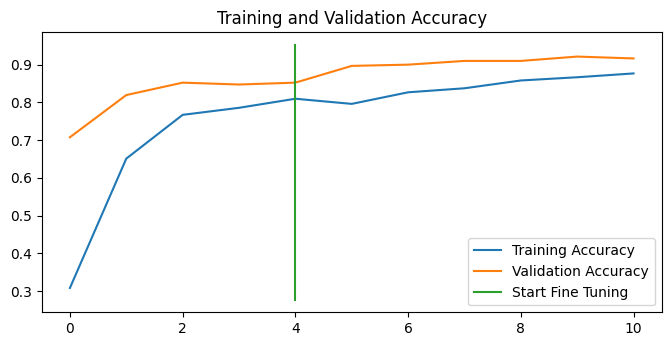

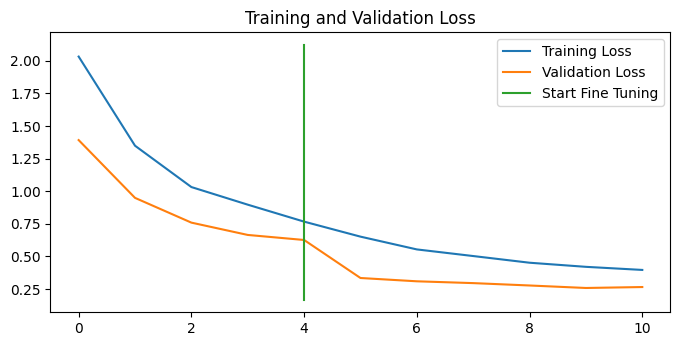

In [ ]:
compare_historys(original_history=history_2,
                 new_history=history_4,
                 initial_epochs=initial_epochs)

In [ ]:
!tensorboard dev

2025-02-11 19:46:16.300362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739303176.354240   56932 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739303176.371551   56932 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
ERROR: The `tensorboard dev` command is no longer available.

TensorBoard.dev has been shut down. For further information,
see the FAQ at <https://tensorboard.dev/>.
